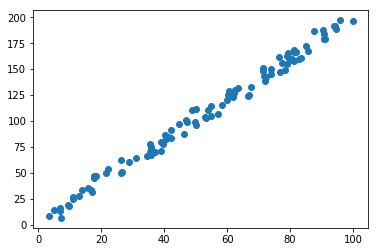

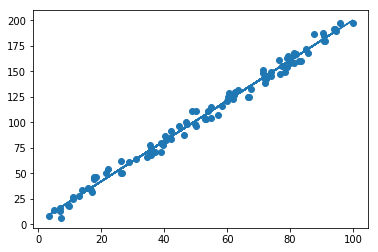

the r-squared is: 0.9911838202977805


In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = []
Y = []
for line in open('data_1d.csv'):
    x, y = line.split(',')
    X.append(float(x))
    Y.append(float(y))

#turn X and Y into numpy array
X=np.array(X)
Y=np.array(Y)


plt.scatter(X,Y)
plt.show()

# apply the equations we learned to calculate a and b

# denominator is common
# note: this could be more efficient if
#       we only computed the sums and means once
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean()*X.sum() ) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) ) / denominator

# let's calculate the predicted Y
Yhat = a*X + b

# let's plot everything together to make sure it worked
plt.scatter(X, Y)
plt.plot(X, Yhat)
plt.show()

# determine how good the model is by computing the r-squared
d1 = Y - Yhat
d2 = Y - Y.mean()
r2 = 1 - d1.dot(d1) / d2.dot(d2)
print("the r-squared is:", r2)

0.9911838202977805
24.796099146071416


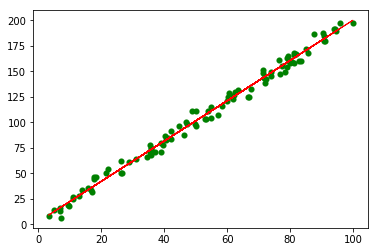

In [2]:
#1-D Linear Regression

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics

df=pd.read_csv('data_1d.csv',header=None).rename(columns = {0:'Quantity',1:'Revenue'})
df

# 建立线性回归模型
regr = LinearRegression()

# 拟合
regr = regr.fit(df['Quantity'].values.reshape(-1,1),df['Revenue'])   #linear_model.LinearRegression()  (x,y) 
# 注意此处.reshape(-1, 1)，因为X是一维的！

# 不难得到直线的斜率、截距
a, b = regr.coef_, regr.intercept_

# let's calculate the predicted Y

#Yhat = a*df['Quantity'].values + b  #Yhat=np.array(Yhat)
Yhat=regr.predict(df['Quantity'].values.reshape(-1,1))

# 1.真实的点
plt.scatter(df['Quantity'], df['Revenue'], color='green',linewidths=0.1)

# 2.拟合的直线
plt.plot(df['Quantity'], Yhat, color='red', linewidth=1)


print(metrics.r2_score(df['Revenue'],Yhat))   #r2_score(y_test, y_pred)
print(metrics.mean_squared_error(df['Revenue'],Yhat))

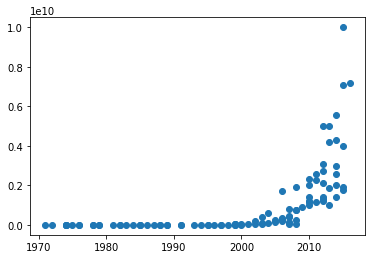

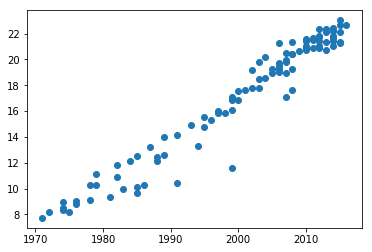

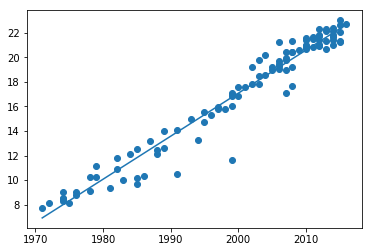

the r-squared is: 0.9529442852285758


In [10]:
#Moore Law
import re
import numpy as np
import matplotlib.pyplot as plt
X = []
Y = []

# some numbers show up as 1,170,000,000 (commas)
# some numbers have references in square brackets after them
non_decimal = re.compile(r'[^\d]+')

for line in open('moore.csv'):
    r = line.split('\t')

    x = int(non_decimal.sub('', r[2].split('[')[0]))
    y = int(non_decimal.sub('', r[1].split('[')[0]))
    X.append(x)
    Y.append(y)
 
X = np.array(X)
Y = np.array(Y)

plt.scatter(X,Y)
plt.show()

Y=np.log(Y)

plt.scatter(X,Y)
plt.show()

denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean()*X.sum() ) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) ) / denominator

# let's calculate the predicted Y
Yhat = a*X + b

# let's plot everything together to make sure it worked
plt.scatter(X, Y)
plt.plot(X, Yhat)
plt.show()

# determine how good the model is by computing the r-squared
d1 = Y - Yhat
d2 = Y - Y.mean()
r2 = 1 - d1.dot(d1) / d2.dot(d2)
print("the r-squared is:", r2)